In [1]:
import numpy as np 

In [2]:
import pandas as pd 

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

D:\WisenProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
from statsmodels.tsa.stattools import adfuller

In [7]:
plt.style.use('fivethirtyeight')

In [8]:
pas = pd.read_csv('PassengerFlowDataset.csv')


In [9]:
pas.head()

,Place name,Year,January,February,March,April,May,June,July,August,September,October,November,December,Whole year,Coordinates
0,Abakan,2020,13495,14940,0,0,0,0,0,0,0,0,0,0.0,0,"(Decimal('91.399735'), Decimal('53.751351'))"
1,Aikhal,2020,0,0,0,0,0,0,0,0,0,0,0,0.0,0,"(Decimal('111.543324'), Decimal('65.957161'))"
2,Loss,2020,0,0,0,0,0,0,0,0,0,0,0,0.0,0,"(Decimal('125.398355'), Decimal('58.602489'))"
3,Amderma,2020,0,0,0,0,0,0,0,0,0,0,0,0.0,0,"(Decimal('61.577429'), Decimal('69.759076'))"
4,Anadyr (Carbon),2020,4255,4565,0,0,0,0,0,0,0,0,0,0.0,0,"(Decimal('177.738273'), Decimal('64.713433'))"


In [10]:
pas.isna().sum()/len(pas)*100

Place name     0.0
Year           0.0
January        0.0
February       0.0
March          0.0
April          0.0
May            0.0
June           0.0
July           0.0
August         0.0
September      0.0
October        0.0
November       0.0
December       0.0
Whole year     0.0
Coordinates    0.0
dtype: float64

In [11]:
pas.head()

,Place name,Year,January,February,March,April,May,June,July,August,September,October,November,December,Whole year,Coordinates
0,Abakan,2020,13495,14940,0,0,0,0,0,0,0,0,0,0.0,0,"(Decimal('91.399735'), Decimal('53.751351'))"
1,Aikhal,2020,0,0,0,0,0,0,0,0,0,0,0,0.0,0,"(Decimal('111.543324'), Decimal('65.957161'))"
2,Loss,2020,0,0,0,0,0,0,0,0,0,0,0,0.0,0,"(Decimal('125.398355'), Decimal('58.602489'))"
3,Amderma,2020,0,0,0,0,0,0,0,0,0,0,0,0.0,0,"(Decimal('61.577429'), Decimal('69.759076'))"
4,Anadyr (Carbon),2020,4255,4565,0,0,0,0,0,0,0,0,0,0.0,0,"(Decimal('177.738273'), Decimal('64.713433'))"


In [12]:
long = pas.melt(id_vars = ['Place name', 'Year'],
         value_vars = ['January', 'February', 'March', 'April', 'May','June', 'July', 'August', 'September', 'October', 'November','December'])

long.rename(columns = {'variable':'month', 'value':'passengers'}, inplace = True)

In [13]:
months = ['January', 'February', 'March', 'April', 'May','June', 'July', 'August', 'September', 'October', 'November','December']
long['month'] = pd.Categorical(long['month'], categories=months, ordered=True)

In [14]:
long

,Place name,Year,month,passengers
0,Abakan,2020,January,13495.00
1,Aikhal,2020,January,0.00
2,Loss,2020,January,0.00
3,Amderma,2020,January,0.00
4,Anadyr (Carbon),2020,January,4255.00
...,...,...,...,...
47527,Yakutsk,2007,December,1916.60
47528,Yakutsk (Magan),2007,December,0.00
47529,Yamburg,2007,December,8.87
47530,Yaroslavl (Tunoshna),2007,December,2055.60


In [15]:
per_year = long.groupby('Year')['passengers'].sum()/1000000
per_year = per_year.reset_index()

(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 <a list of 9 Text major ticklabel objects>)

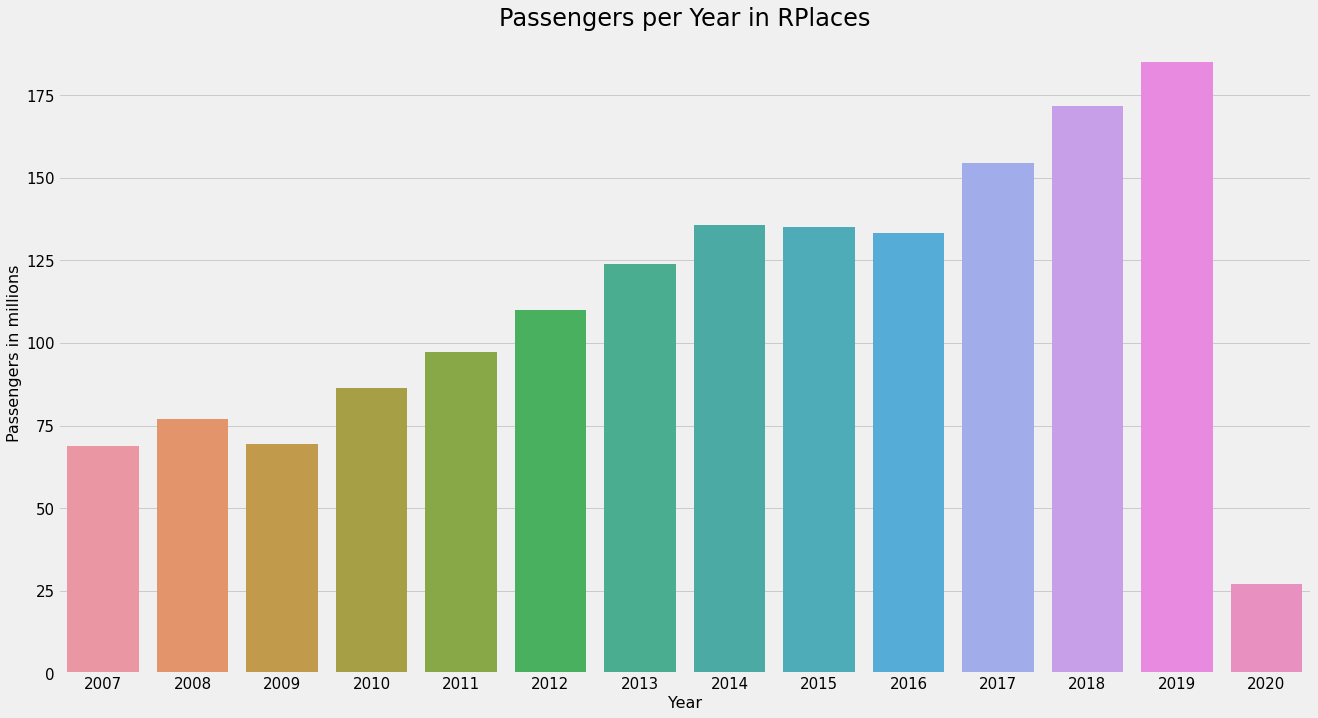

In [16]:
plt.figure(figsize=(20,11))

sns.barplot(data = per_year, x = 'Year', y = 'passengers')
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Passengers in millions', fontsize = 16)
plt.title("Passengers per Year in RPlaces", fontsize = 24)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [17]:
ts =  long.groupby(['Year', 'month'])['passengers'].sum()

In [18]:
ts.to_frame()

passengers
Year month                
2007 January     4290267.0
     February    3897237.0
     March       4631915.0
     April       5152085.0
     May         5767910.0
...                    ...
2020 August            0.0
     September         0.0
     October           0.0
     November          0.0
     December          0.0

[168 rows x 1 columns]

In [19]:
ts = ts.reset_index()

In [20]:
time = range(1,169)

In [21]:
ts['time'] = time 

In [22]:
ts['pasmio'] = ts['passengers'] / 1000000    

Text(0.5, 1.0, 'Time Series of passengers from 2007-2020')

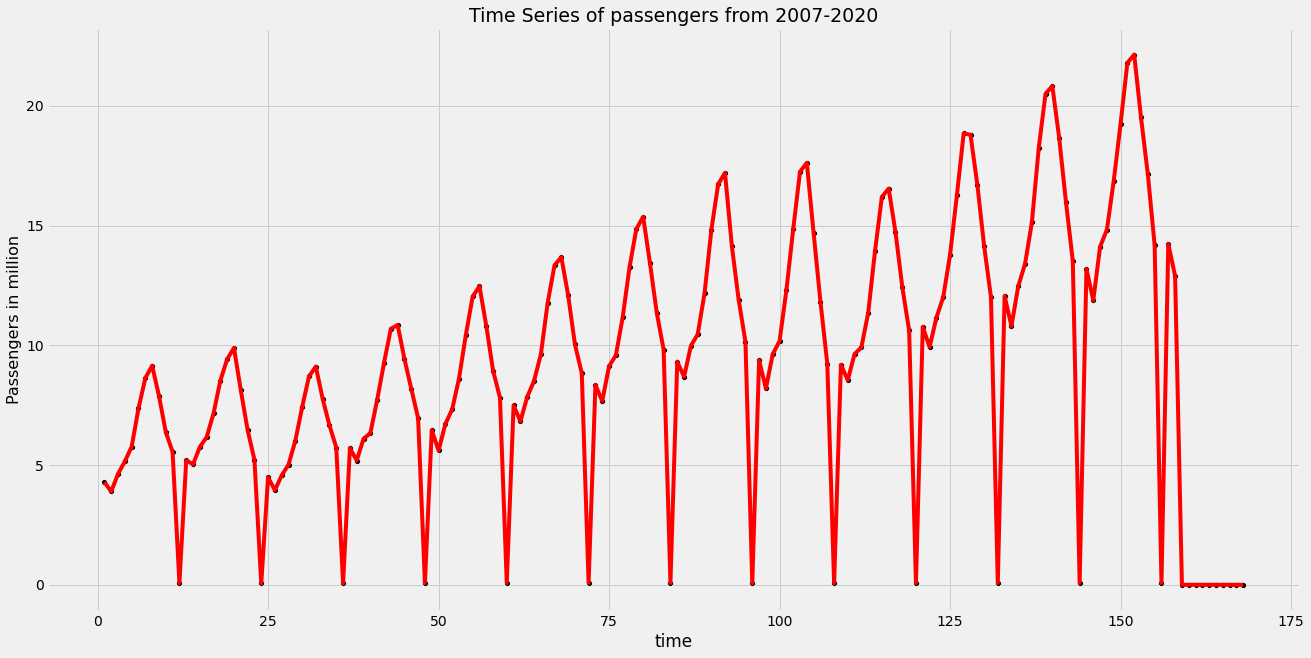

In [23]:
plt.figure(figsize = (20,10))

sns.scatterplot(data = ts, x = 'time', y = 'pasmio', color = 'black')
sns.lineplot(data = ts, x = 'time', y = 'pasmio', color = 'r')
plt.ylabel('Passengers in million', fontsize=  16)
plt.title("Time Series of passengers from 2007-2020", fontsize = 19)

In [24]:
ts

,Year,month,passengers,time,pasmio
0,2007,January,4290267.0,1,4.290267
1,2007,February,3897237.0,2,3.897237
2,2007,March,4631915.0,3,4.631915
3,2007,April,5152085.0,4,5.152085
4,2007,May,5767910.0,5,5.767910
...,...,...,...,...,...
163,2020,August,0.0,164,0.000000
164,2020,September,0.0,165,0.000000
165,2020,October,0.0,166,0.000000
166,2020,November,0.0,167,0.000000


In [25]:
results = adfuller(ts['pasmio'])
print(results[1])

0.3622237575395337


In [26]:
ts['log_pas'] = np.log(ts['pasmio'])

D:\WisenProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [27]:
X = ts['time'].values
X = np.reshape(X, (len(X), 1))

In [28]:
y = ts['pasmio'].values

In [29]:
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
trend = model.predict(X)

Text(0.5, 1.0, 'Time Series of passengers from 2007-2020')

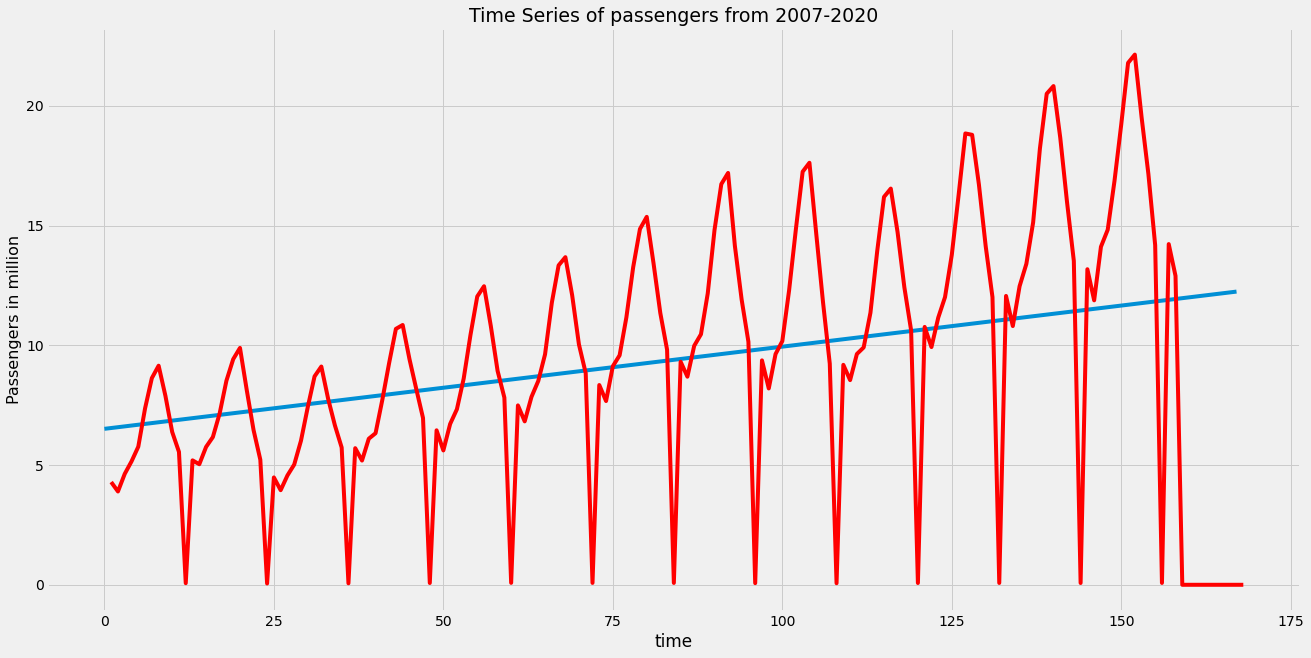

In [31]:
plt.figure(figsize = (20,10))

sns.lineplot(data = trend)
sns.lineplot(data = ts, x = 'time', y = 'pasmio', color = 'r')
plt.ylabel('Passengers in million', fontsize=  16)
plt.title("Time Series of passengers from 2007-2020", fontsize = 19)

In [32]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
detrended = [y[i]-trend[i] for i in range(0, len(ts))]

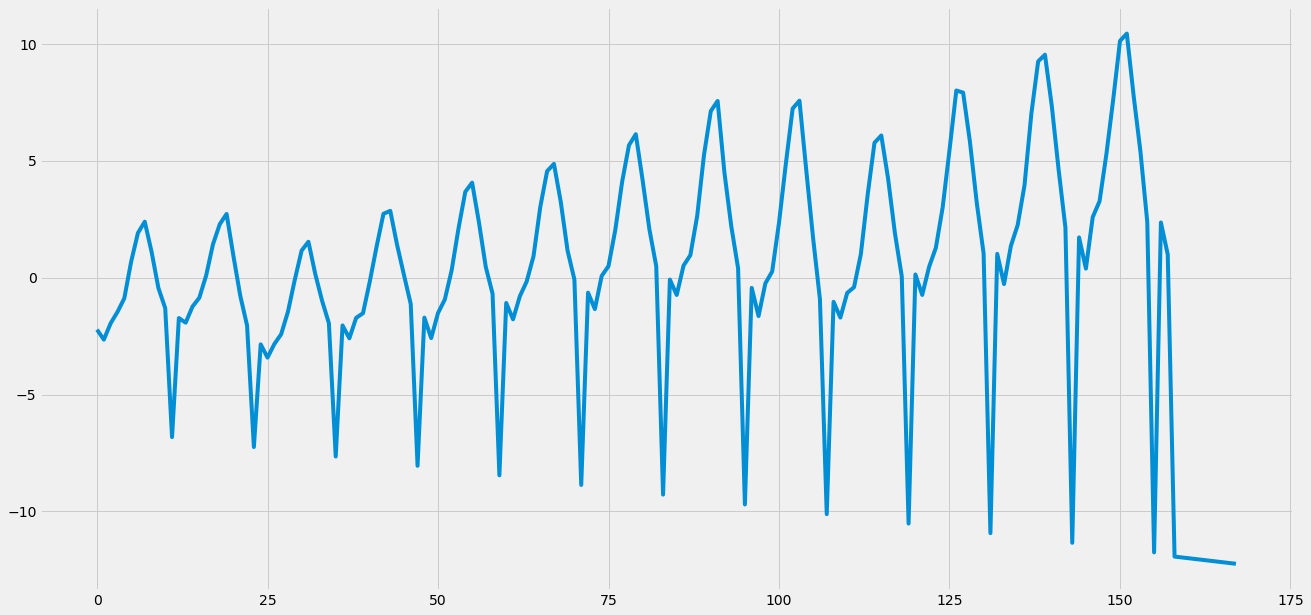

In [34]:
plt.figure(figsize = (20,10))

plt.plot(detrended)
plt.show()

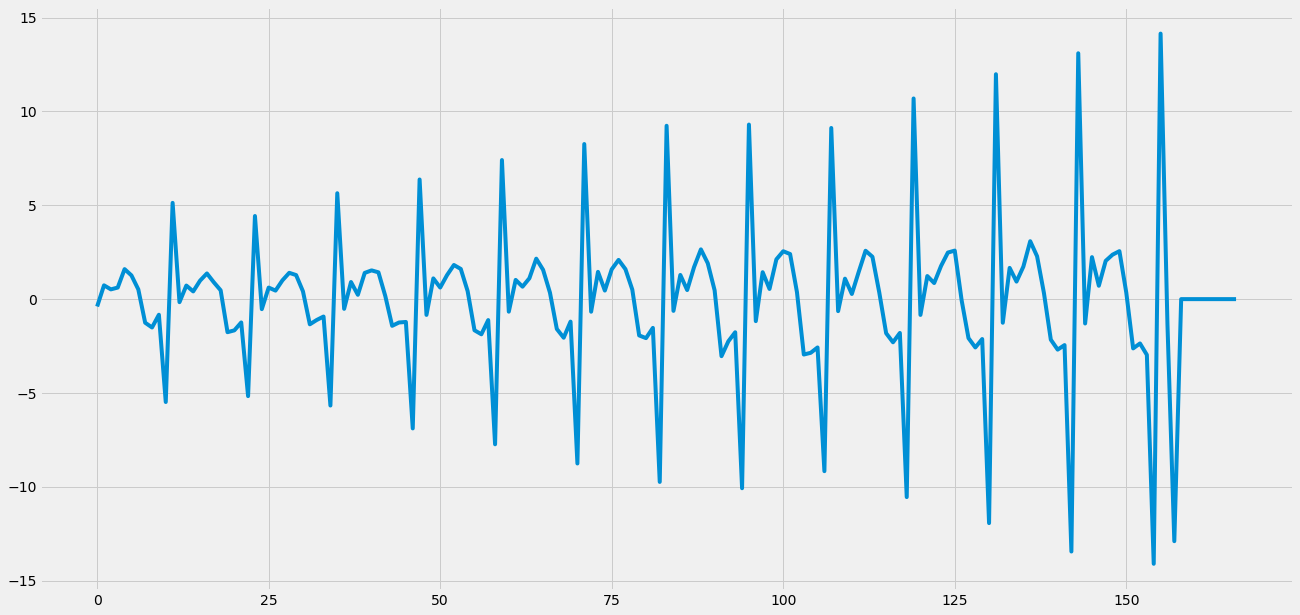

In [35]:
plt.figure(figsize = (20,10))

X = ts['pasmio'].values

diff = list()
for i in range(1, len(X)):
	value = X[i] - X[i - 1]
	diff.append(value)
plt.plot(diff)
plt.show()

In [36]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf

In [37]:
detrended = pd.Series(detrended)

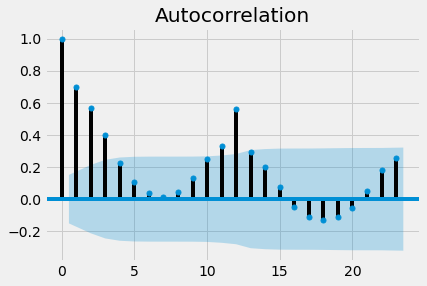

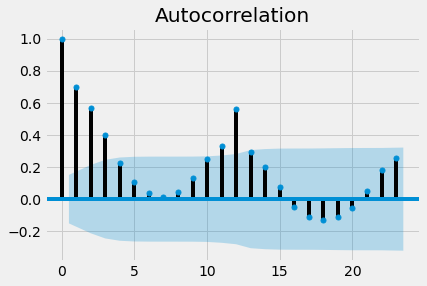

In [38]:
plot_acf(ts['pasmio'])

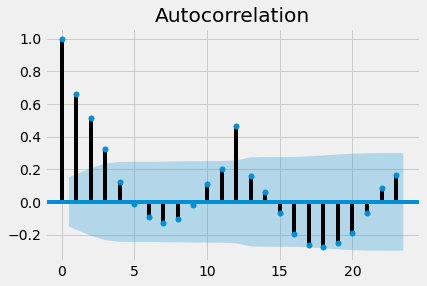

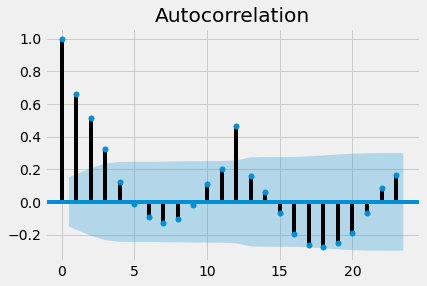

In [39]:
plot_acf(detrended)